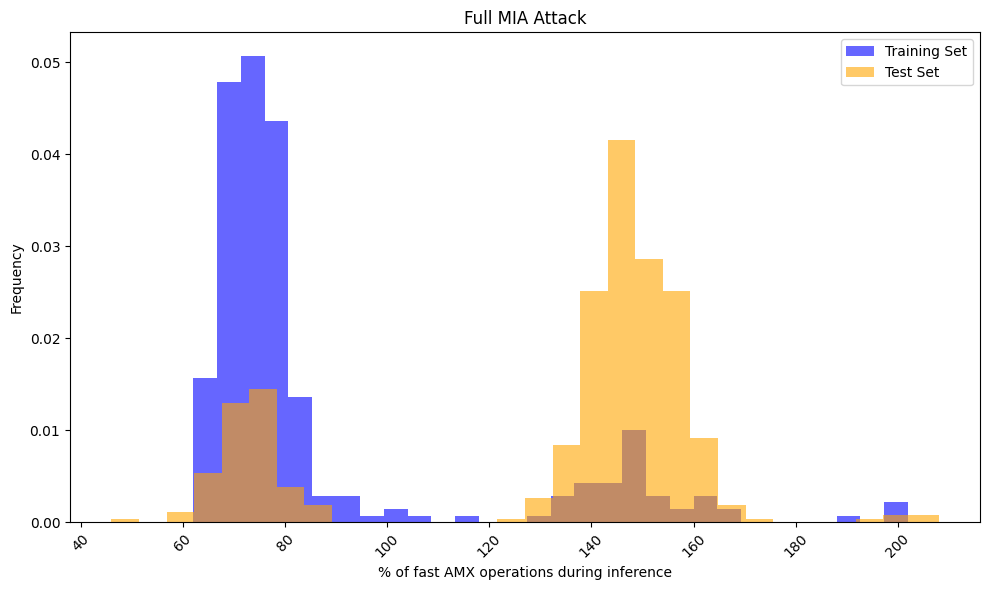

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('amx_sniff_data.csv', header=None, names=['label', 'value'])
# df['value'] = df['value'].str.rstrip('%').astype(float)

# Separate data based on label (0 or 1)
values_0 = df[df['label'] == 0]['value']
values_1 = df[df['label'] == 1]['value']

# Plot histograms

plt.figure(figsize=(10, 6))
plt.hist(values_0, bins=30, alpha=0.6, label='Training Set', color='blue', density=True)
plt.hist(values_1, bins=30, alpha=0.6, label='Test Set', color='orange', density=True)

# Labels and legend
plt.title('Full MIA Attack')
plt.xlabel('% of fast AMX operations during inference')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

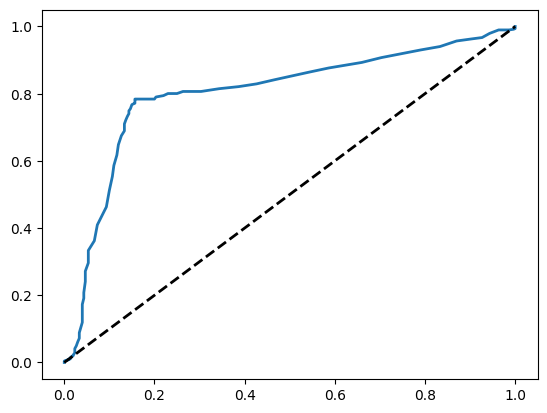

In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
df = pd.read_csv('amx_sniff_data.csv', header=None, names=['train', 'fast amx slices'])
fpr, tpr, thresholds = roc_curve(df["train"], df["fast amx slices"]);
plt.plot(fpr, tpr, lw=2, label=f'ROC')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Diagonal line

In [4]:
y_true = df["train"]
y_scores = df["fast amx slices"]

# Find the best threshold (Youden's J statistic)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

y_pred = (y_scores >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
fpr_value = fp / (fp + tn) if (fp + tn) > 0 else 0.0
accuracy = accuracy_score(y_true, y_pred)

# Compute rates
total_positives = tp + fn
total_negatives = tn + fp

tpr_value = tp / total_positives if total_positives > 0 else 0.0
fnr_value = fn / total_positives if total_positives > 0 else 0.0
tnr_value = tn / total_negatives if total_negatives > 0 else 0.0
fpr_value = fp / total_negatives if total_negatives > 0 else 0.0

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"True Positive Rate (TPR / Sensitivity): {tpr_value:.4f}")
print(f"False Negative Rate (FNR): {fnr_value:.4f}")
print(f"True Negative Rate (TNR / Specificity): {tnr_value:.4f}")
print(f"False Positive Rate (FPR): {fpr_value:.4f}")
print(f"Precision: {tp/(tp+fp)}")

Best Threshold: 124.0000
Accuracy: 0.8066
True Positives: 381
False Positives: 47
True Negatives: 253
False Negatives: 105
True Positive Rate (TPR / Sensitivity): 0.7840
False Negative Rate (FNR): 0.2160
True Negative Rate (TNR / Specificity): 0.8433
False Positive Rate (FPR): 0.1567
Precision: 0.8901869158878505


# 